In [1]:
import sys
sys.path.append("/Users/shamanthk/Documents/Research/IS-modeling-connectomes")
from utils import *
from Connectome import *

In [2]:
avg_connectome = Connectome(file='/Users/shamanthk/Documents/Research/IS-modeling-connectomes/Averaged_1015.graphml', label='average')

In [3]:
avg_connectome.read_matrix()

<Compressed Sparse Row sparse array of dtype 'int64'
	with 198342 stored elements and shape (1015, 1015)>

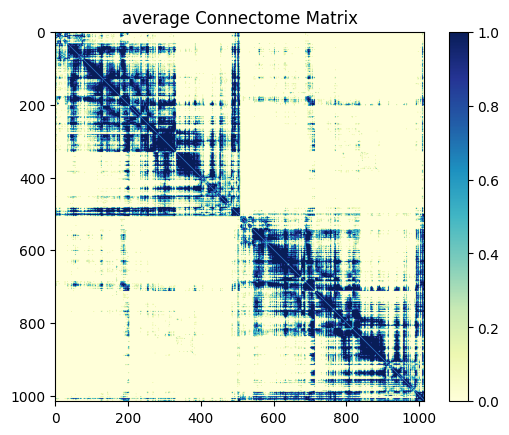

In [4]:
avg_connectome.plot_matrix()

In [5]:
avg_connectome.read_net(use_3d=True)

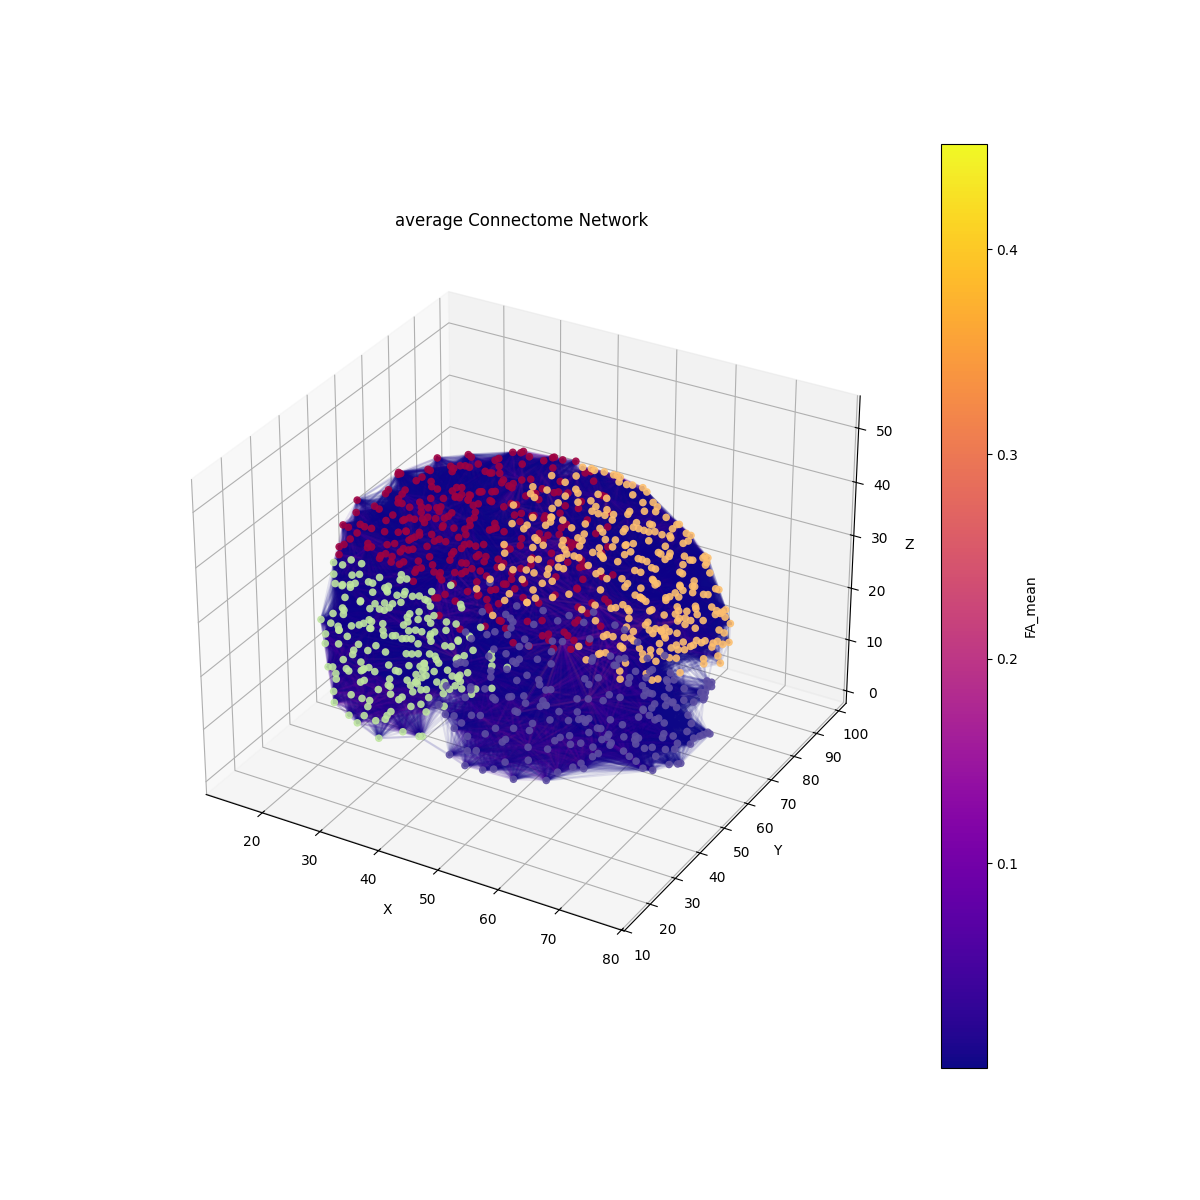

In [6]:
%matplotlib widget
avg_connectome.plot_net(use_3d=True, clustering=True)

type checking the centrality metrics

In [8]:
cent_metrics = avg_connectome.store_centrality_metrics()

In [18]:
cent_metrics['degree_centrality'] # the metric for degree centrality for the node with label 1008

{'1008': 0.7001972386587771,
 '502': 0.68836291913215,
 '503': 0.6873767258382644,
 '1009': 0.6607495069033531,
 '504': 0.5522682445759369,
 '1010': 0.5266272189349113,
 '507': 0.48816568047337283,
 '1013': 0.4546351084812624,
 '770': 0.4477317554240631,
 '486': 0.4299802761341223,
 '254': 0.4191321499013807,
 '191': 0.4191321499013807,
 '991': 0.4171597633136095,
 '1011': 0.41420118343195267,
 '505': 0.4102564102564103,
 '194': 0.4092702169625247,
 '698': 0.4092702169625247,
 '703': 0.4072978303747535,
 '198': 0.40433925049309666,
 '769': 0.40433925049309666,
 '188': 0.40236686390532544,
 '707': 0.4003944773175543,
 '256': 0.3984220907297831,
 '255': 0.3984220907297831,
 '127': 0.39644970414201186,
 '487': 0.39546351084812625,
 '757': 0.3915187376725838,
 '632': 0.3905325443786982,
 '301': 0.3905325443786982,
 '700': 0.38954635108481267,
 '701': 0.38856015779092706,
 '284': 0.38658777120315585,
 '706': 0.38560157790927024,
 '235': 0.3816568047337278,
 '826': 0.3806706114398422,
 '203'

In [ ]:
avg_connectome.graph.nodes['1008'] # the attributes for the node with label 1008

{'dn_position_x': 50.84996113594743,
 'dn_position_y': 55.69064310631955,
 'dn_position_z': 20.35414320169698,
 'dn_correspondence_id': '1008',
 'dn_region': 'subcortical',
 'dn_fsname': 'Left-Thalamus-Proper',
 'dn_name': 'Left-Thalamus-Proper',
 'dn_hemisphere': 'left'}

In [15]:
avg_connectome.graph.nodes['1008']['dn_hemisphere']

'left'

In [ ]:
import pandas as pd
data = {node_id: attr['dn_hemisphere'] for node_id, attr in avg_connectome.graph.nodes(data=True)}

df = pd.DataFrame.from_dict(data, orient='index', columns=['dn_hemisphere'])

df.head()

,dn_hemisphere
1,right
2,right
3,right
4,right
5,right


In [20]:
df['deg_cent'] = pd.Series(cent_metrics['degree_centrality'])
df.head()

,dn_hemisphere,deg_cent
1,right,0.035503
2,right,0.028600
3,right,0.116371
4,right,0.230769
5,right,0.013807


In [22]:
df = df.reset_index(drop=True)
df.head()

,dn_hemisphere,deg_cent
0,right,0.035503
1,right,0.028600
2,right,0.116371
3,right,0.230769
4,right,0.013807
